#<font color='#4ecefc'>***Trabajo integrador:*** *Buscando nuestro público objetivo*

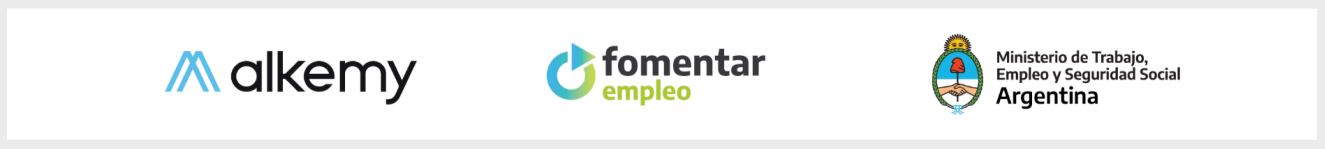


## <font color='#a3fa57'>Objetivo:
>Entender a fondo a los consumidores: a qué se dedican, qué hacen, qué edad tienen, qué les gusta, qué les duele, y qué necesitan. Esto les permitirá optimizar, contextualizar y personalizar los mensajes hacia los clientes lo que a su vez les ayudará a definir mejores campañas y obtener leads de mayor calidad, es decir, potenciales clientes más alineados con los productos y servicios.




## <font color='#a3fa57'>*Setup*
>Instalación e importación de las librerías necesarias.

In [1]:
!pip install pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
import pandas as pd
import os

In [3]:
print(pd.__version__)

2.2.2


## <font color='#a3fa57'>*Carga de datos*

> Primero se cargan los csv que contienen las tablas con las que se va a trabajar.


### <font color='#4ecefc'>Clientes: dfcliente
En esta tabla se tiene principalmente la ubicación geográfica de los clientes.

In [4]:
dfcliente = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_customers_dataset.csv")
dfcliente.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### <font color='#4ecefc'>Items: dfitem
En esta tabla, la información más destacable es el precio de los productos y los envíos.

In [5]:
dfitem = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_order_items_dataset.csv")
dfitem.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### <font color='#4ecefc'>Ordenes de pago: dfpagos
Aquí se encuentran los métodos de pagos, las cuotas y el valor total de la compra (resultado de sumar el precio y el envío de la tabla anterior).

In [6]:
dfpago = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_order_payments_dataset.csv")
dfpago.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### <font color='#4ecefc'>Ordenes: dforden
En esta tabla están todas las fechas: cuando se realizó la compra, cuando se aprobó, cuando se envió, cuando le llego al consumidor y cuál era su fecha estimada.

In [7]:
dforden = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_orders_dataset.csv")
dforden.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### <font color='#4ecefc'>Productos: dfproduc
Aquí se encuentran las categorías de los productos y sus características físicas (dimensiones y peso ) también la longitud de la descripción y la cantidad de fotos.

In [8]:
dfproduc = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_products_dataset.csv")
dfproduc.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## <font color='#a3fa57'>*Contenido de los df*
> Ahora se comienza a estudiar el contenido de las tablas cargadas, sus columnas, cantidad de datos, sus tipos, cantidad de duplicados y nulos.

In [9]:
#Definimos una función para obtener información importante sobre la cantidad y tipos de datos
def dfdescr(df):
  print('\033[36m' + "Nombre de las columnas, cantidad y tipos de datos de cada una:"+'\033[0m')
  print(df.info(), "\n")
  print('\033[36m' + "Cantidad de datos nulos"+'\033[0m')
  print(df.isnull().sum(),"\n")
  print('\033[36m' + "Cantidad de filas duplicadas"+'\033[0m')
  print(df.duplicated().sum())


###<font color='#4ecefc'> Clientes

In [10]:
dfdescr(dfcliente)

Nombre de las columnas, cantidad y tipos de datos de cada una:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Cantidad de datos nulos
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Cantidad de filas duplicadas
0


###<font color='#4ecefc'> Ítems

In [11]:
dfdescr(dfitem)

Nombre de las columnas, cantidad y tipos de datos de cada una:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None 

Cantidad de datos nulos
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Cantidad de filas duplicadas
0


###<font color='#4ecefc'> Ordenes de pago

In [12]:
dfdescr(dfpago)

Nombre de las columnas, cantidad y tipos de datos de cada una:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None 

Cantidad de datos nulos
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Cantidad de filas duplicadas
0


###<font color='#4ecefc'> Ordenes

In [13]:
dfdescr(dforden)

Nombre de las columnas, cantidad y tipos de datos de cada una:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

Cantidad de datos nulos
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_a

###<font color='#4ecefc'> Productos

In [14]:
dfdescr(dfproduc)

Nombre de las columnas, cantidad y tipos de datos de cada una:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None 

Cantidad de datos nulos
product_id                      0
product_category_name         610
product_name_lenght           610
product_descripti

## <font color='#a3fa57'>*Transformaciones*
> Se transforman los datos que sean necesarios para homogeneizar y simplificar su utilización posterior.

In [15]:
def transformarFechas(df, columnas_fechas):
    df[columnas_fechas] = df[columnas_fechas].apply(pd.to_datetime)
    return df

def convertirMinusculas(df, columna):
    df[columna] = df[columna].str.lower()
    return df

def eliminarNulos(df):
  for i in df.isnull().sum():
    if i != 0:
      i/len(df)*100
      print(f"la cantidad de nulos es {i}, {i/len(df)*100:.2f}% del total")

def transformarString(df, columnas_string):
    for columna in columnas_string:
        df[columna] = df[columna].astype("string")
    return df


###<font color='#4ecefc'> Clientes
> Esta tabla no presenta nulos ni columnas con fechas, pero tiene dos columnas del tipo object, en el que puede haber discrepancias en cómo se ingresó la misma información en distintas instancias, por lo que es prudente forzar a que todos los datos de estas columnas están en minúscula. Además se convierte los datos tipo object a string y la única columna tipo int, ya que en esta se tiene el código postal, que a pesar de ser un número es un dato cualitativo categórico.

In [16]:
dfcliente.select_dtypes(include=['object']).columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')

In [17]:
dfcliente = convertirMinusculas(dfcliente, 'customer_city')
dfcliente = convertirMinusculas(dfcliente, 'customer_state')

In [18]:
dfcliente = transformarString(dfcliente, ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'])

###<font color='#4ecefc'> Ítems
> Esta tabla tampoco tiene datos nulas y no tiene columnas con datos object que se deban tratar, pero si tiene una columna con fechas que no es del tipo de dato correcto. También se convierte a string las primeras cuatro columnas que son identificaciones (IDs).

In [19]:
dfitem = transformarString(dfitem, ['order_id', 'order_item_id', 'product_id', 'seller_id'])

In [20]:
dfitem = transformarFechas(dfitem, ['shipping_limit_date'])

###<font color='#4ecefc'> Ordenes de pago
> En esta tabla tampoco se tienen valores nulos ni fechas, pero existe una columna del tipo object que se puede convertir a minúscula. Además se transforma las columnas tipo object a string.

In [21]:
dfpago = convertirMinusculas(dfpago, 'payment_type')

In [22]:
dfpago = transformarString(dfpago, ['order_id', 'payment_type'])

###<font color='#4ecefc'> Ordenes
> Esta tabla tiene varias columnas de fecha con el tipo de dato incorrecto y tiene nulos, pero no presenta columnas a homogeneizar. También se cambia las primeras tres columnas a tipo string.

In [23]:
eliminarNulos(dforden)

la cantidad de nulos es 160, 0.16% del total
la cantidad de nulos es 1783, 1.79% del total
la cantidad de nulos es 2965, 2.98% del total


>Como la cantidad de nulos es menor al 5% (en el peor de los casos no son las mismas filas en cada columna y el total es 0.16 + 1.79 + 2.98 = 4.93) se procede a eliminar las filas con valores nulos.

In [24]:
dforden.dropna(axis=0, inplace=True)

In [25]:
dforden.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [26]:
columnas_fechas_orders = ['order_purchase_timestamp', 'order_approved_at',
                          'order_delivered_carrier_date', 'order_delivered_customer_date',
                          'order_estimated_delivery_date']

dforden = transformarFechas(dforden, columnas_fechas_orders)

In [27]:
dforden = transformarString(dforden, ['order_id', 'customer_id', 'order_status'])

###<font color='#4ecefc'> Productos
>Finalmente, esta tabla tienen valores nulos y una del tipo object que se puede homogeneizar y convertir a string, pero no presenta fechas.

In [28]:
eliminarNulos(dfproduc)

la cantidad de nulos es 610, 1.85% del total
la cantidad de nulos es 610, 1.85% del total
la cantidad de nulos es 610, 1.85% del total
la cantidad de nulos es 610, 1.85% del total
la cantidad de nulos es 2, 0.01% del total
la cantidad de nulos es 2, 0.01% del total
la cantidad de nulos es 2, 0.01% del total
la cantidad de nulos es 2, 0.01% del total


> Como esta vez la suma total de los nulos de todas las columnas si podrian pasar el 5% se revisa si coinciden las filas.
>Como efectivamente en todos los casos son las mismas 610 filas se eliminas dichas filas.

In [29]:
dfproduc[pd.isnull(dfproduc['product_category_name'])& pd.isnull(dfproduc['product_name_lenght'])& pd.isnull(dfproduc['product_description_lenght'])]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [30]:
dfproduc.dropna(axis=0, inplace=True)

In [31]:
dfproduc.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [32]:
dfproduc = convertirMinusculas(dfproduc, "product_category_name")

In [33]:
dfproduc = transformarString(dfproduc,['product_id', 'product_category_name'] )

## <font color='#a3fa57'>*Análisis*
> A continuación se analiza el contenido de cada columna de las tablas para decidir qué información es relevante.


In [38]:
def descEstadistica(df):
  if not df.select_dtypes(include=['int', 'float']).empty:

    print('\033[36m' + "Análisis variables cuantitativas"+'\033[0m')
    columnas_numericas = df.select_dtypes(include=['int', 'float']).columns
    if not columnas_numericas.empty:
      print(df[columnas_numericas].describe(),"\n")

  if not df.select_dtypes(include=['string']).empty :

    print('\033[36m' + "Análisis variables cualitativas"+'\033[0m')
    columnas_string = df.select_dtypes(include=['string']).columns
    if not columnas_string.empty:
      print(df[columnas_string].describe())

###<font color='#4ecefc'> Clientes
> A esta tabla se le presta especial atención ya que los consumidores son el centro del estudio que se está buscando hacer. Particularmente se le puede sacar bastante provecho a lugar geográfico en donde se encuentra.


In [ ]:
descEstadistica(dfcliente)

Análisis variables cualitativas
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

       customer_zip_code_prefix customer_city customer_state  
count                     99441         99441          99441  
unique                    14994          4119             27  
top                       22790     sao paulo             sp  
freq                        142         15540          41746  


<font color='#a3fa57'>Como muestran los datos anteriores, se tienen un numero total de 96096 clientes en 4119 ciudades de los 27 estados de Brasil.

In [ ]:
dfcliente['customer_state'].value_counts()[:10]


customer_state
sp    41746
rj    12852
mg    11635
rs     5466
pr     5045
sc     3637
ba     3380
df     2140
es     2033
go     2020
Name: count, dtype: Int64

> Como muestra la tabla anterior, del total de 99441 registros, más del 40% se registró en el estado de Sao Paulo, un 13% en Rio de Janeiro y un 12% en Minas Gerais. Es decir, solo en estos tres estados están dos tercios de los clientes registrados de la tienda. Completando el top 10 se tiene a Río Grande del Sur, Estado de Paraná, Santa Catarina, Bahía, Distrito Federal, Espírito Santo y Goiás. En estos 10 de los 27 estados se acumulan el 90% de los registros de los clientes.


> Estos datos se pueden contrastar con datos poblacionales, para analizar si la cantidad de clientes es proporcional a la población (y más profundamente se puede agragar un análisis socioeconómico por estado). Por ejemplo, es razonable que el estado con más clientes sea Sao Paulo ya que tiene la mayor cantidad de habitantes del país. Por otro lado, la cantidad de clientes en Rio de Janeiro y Mina Gerais son prácticamente iguales cuando, en realidad, en Mina Gerais hay cerca de un cuarto más de población (20.538.718 vs 16.054.524, según el censo de 2022).

###<font color='#4ecefc'> Ítems
> Entre estos datos se tiene información del rango de precios de los productos y el vendedor, lo que se puede tomar como un reflejo de las tendencias de compra de los clientes.


In [ ]:
descEstadistica(dfitem)

Análisis variables cuantitativas
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000 

Análisis variables cualitativas
                                order_id order_item_id  \
count                             112650        112650   
unique                             98666            21   
top     8272b63d03f5f79c56e9e4120aec44ef             1   
freq                                  21         98666   

                              product_id                         seller_id  
count                             112650                            112650  
unique                             32951                              3095  
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0  
freq      

In [ ]:
dfitem.groupby('product_id').agg({'price': ['sum', 'count']}).reset_index().sort_values(by=('price', 'sum'), ascending=False)[:5]

product_id     price      
                                              sum count
24086  bb50f2e236e5eea0100680137654686c  63885.00   195
14068  6cdd53843498f92890544667809f1595  54730.20   156
27613  d6160fb7873f184099d9bc95e30376af  48899.34    35
27039  d1c427060a0f73f6b889a5c7c61f2ac4  47214.51   343
19742  99a4788cb24856965c36a24e339b6058  43025.56   488

In [ ]:
dfitem.groupby('seller_id').agg({'price': ['sum', 'count']}).reset_index().sort_values(by=('price', 'sum'), ascending=False)[:5]

seller_id      price      
                                              sum count
857   4869f7a5dfa277a7dca6462dcf3b52b2  229472.63  1156
1013  53243585a1d6dc2643021fd1853d8905  222776.05   410
881   4a3ca9315b744ce9f8e9374361493884  200472.92  1987
3024  fa1c13f2614d7b5c4749cbc52fecda94  194042.03   586
1535  7c67e1448b00f6e969d365cea6b010ab  187923.89  1364

> Comenzando por los productos en sí, en el top 10 de los productos con los que más se recauda, se puede llegar a ver como el rango de precios de los productos más vendidos es bastante variado ya que para el primer y segundo productos se tienen ganancias similares con cantidades similares, pero con el tercer y cuarto producto se tienen ganancias similares con 10 veces menos ventas del tercer producto (es decir, el cuarto producto es mucho más barato pero mucho más vendido).


> Algo similar ocurre con los vendedores, ya que entre el primer y segundo vendedor se tiene prácticamente la misma cantidad de ganancia pero el segundo realizó menos de la mitad de las transacciones que realizó el primero. Mientras que el tercero recaudó un poco menos pero con más de un 50% más de ventas que el primero. En otras palabras, el segundo vendedor de la tabla anterior vende, a grandes rasgos, productos de mayor precio, mientras que el tercer vendedor vende en mayor medidas productos mucho más baratos.

In [ ]:
dfitem[(dfitem['price']>134.90) & (dfitem['seller_id']=="53243585a1d6dc2643021fd1853d8905")].sort_values(by='price', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
19724,2d472b4b2d08108565852ca0782507f2,1,d6160fb7873f184099d9bc95e30376af,53243585a1d6dc2643021fd1853d8905,2017-09-21 00:20:20,1649.99,40.96
84385,bfb8512783ccd2271d2e96d3b856bf2b,1,d6160fb7873f184099d9bc95e30376af,53243585a1d6dc2643021fd1853d8905,2017-09-21 12:45:16,1649.99,33.42
97199,dc825a422ff7a8e462852fc476ba5686,1,588531f8ec37e7d5ff5b7b22ea0488f8,53243585a1d6dc2643021fd1853d8905,2017-10-03 18:56:13,1599.99,40.61
39809,5a902cc5a20f8cd076f116d16d5aef9d,1,d6160fb7873f184099d9bc95e30376af,53243585a1d6dc2643021fd1853d8905,2017-10-09 20:25:04,1599.99,53.61
64971,94781b7e571ded2ff6f80434f6fe2a43,1,d6160fb7873f184099d9bc95e30376af,53243585a1d6dc2643021fd1853d8905,2017-09-29 14:06:10,1599.99,53.61
...,...,...,...,...,...,...,...
62419,8e8f8ef29c78c7b9c98cac70dd331ce2,4,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.00,30.44
62420,8e8f8ef29c78c7b9c98cac70dd331ce2,5,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.00,30.44
62421,8e8f8ef29c78c7b9c98cac70dd331ce2,6,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.00,30.44
89614,cb7e54b683ab7303fa52e2c3975801a6,1,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-07 20:43:59,170.00,53.54


> Efectivamente, en la tabla de arriba se puede verificar que todas las ventas realizadas por este vendedor son de productos con un precio superior al 75% de los precios. En resumen, se podría decir que es el vendedor más eficiente ya que es el que más recauda con menos ventas y gastos de transporte.

###<font color='#4ecefc'> Ordenes de pago
> Esta tabla muestra tendencias en las compras de los clientes, como los métodos de pago más usados y la cantidad de cuotas.

In [39]:
descEstadistica(dfpago)

Análisis variables cuantitativas
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000 

Análisis variables cualitativas
                                order_id payment_type
count                             103886       103886
unique                             99440            5
top     fa65dad1b0e818e3ccc5cb0e39231352  credit_card
freq                                  29        76795


<font color='#a3fa57'> Como muestran las estadisticas anteriores, el promedio de pago por pedido es de 154.1 reales, que se realizan con un promedio de (redondeando) 3 cuotas.

In [ ]:
dfpago[dfpago['payment_type']=='credit_card']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [ ]:
frec = dfpago["payment_type"].value_counts()
frec

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: Int64

In [ ]:
dfpago.groupby('payment_type').sum().sort_values(by='payment_sequential', ascending=False)

,order_id,payment_sequential,payment_installments,payment_value
payment_type,,,,
credit_card,b81ef226f3fe1789b1e8b2acac839d17a9810da82917af...,77115,269332,12542084.19
boleto,0573b5e23cbd798006520e1d5b4c67148cd68144cdb62d...,19785,19784,2869361.27
voucher,5cfd514482e22bc992e7693f0e3e8df7947e9c6bfd83a0...,15029,5775,379436.87
debit_card,fa2ea4b6e84c1c0fc4f3a6d468c55183cf61ad2218e5c1...,1582,1529,217989.79
not_defined,4637ca194b6387e2d538dc89b124b0ee00b1cb0320190c...,3,3,0.00


In [ ]:
dfpago.groupby('payment_type').sum().sort_values(by='payment_sequential', ascending=False)['payment_value']/frec

payment_type
credit_card    163.319021
boleto         145.034435
voucher         65.703354
debit_card      142.57017
not_defined           0.0
dtype: Float64

> Como se puede ver en las tablas, el método de pago más habitualmente usado es la tarjeta de crédito seguido por el boleto, representando en conjunto más del 90% del total de las transacciones (siendo solo el crédito casi tres cuartas partes del total). Además, se puede decir que las compras que se hacen con cada método son bastante homogéneas, ya que el promedio de compra son valores similares para la tarjeta de crédito, el boleto y la tarjeta de débito (únicamente los vouchers representan compras de notable menor denominación).

###<font color='#4ecefc'> Ordenes
> Con esta tabla se puede analizar el estatus de las órdenes y la calidad del servicio en términos de tiempo.

In [ ]:
descEstadistica(dforden)

Análisis variables cualitativas
                                order_id                       customer_id  \
count                              96461                             96461   
unique                             96461                             96461   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status  
count         96461  
unique            2  
top       delivered  
freq          96455  


<font color='#a3fa57'> El total de pedidos registrados es de 96461.

In [ ]:
dforden['order_status'].value_counts()

order_status
delivered    96455
canceled         6
Name: count, dtype: Int64

In [ ]:
96455/96461

0.999937798695846

> Lo primero que se puede destacar es que el sistema de ventas tiene una tasa de éxito muy alta ya que el prácticamente el 100% de las ventas se enviaron con éxito sin ser cancelados.

In [ ]:
((dforden['order_delivered_customer_date'])-(dforden['order_purchase_timestamp'])).describe()

count                         96461
mean     12 days 13:23:46.585853350
std       9 days 13:06:45.121880865
min                 0 days 12:48:07
25%                 6 days 18:22:50
50%                10 days 05:11:29
75%                15 days 17:17:10
max               209 days 15:05:12
dtype: object

In [ ]:
((dforden['order_delivered_customer_date'])-(dforden['order_purchase_timestamp'])).sort_values(ascending=False)[:5000]

19590   209 days 15:05:12
55619   208 days 08:26:32
61610   195 days 15:12:59
70307   194 days 20:24:15
89130   194 days 15:12:24
               ...       
33182    29 days 00:57:02
10768    29 days 00:55:03
18040    29 days 00:52:50
77667    29 days 00:50:22
28962    29 days 00:49:54
Length: 5000, dtype: timedelta64[ns]

In [ ]:
((dforden['order_estimated_delivery_date'])-(dforden['order_delivered_customer_date'])).describe()

count                         96461
mean     11 days 04:16:01.007909932
std      10 days 04:27:25.366427548
min             -189 days +00:35:53
25%                 6 days 09:20:35
50%                11 days 22:41:24
75%                16 days 05:51:07
max               146 days 00:23:13
dtype: object

> Por otro lado, en las transacciones que se completaron exitosamente, más del 75% llegaron al cliente en alrededor dos semanas o menos contando desde el momento que se realizó la compra. Únicamente un 5% del total (5000) fue entregado en un tiempo mayor a un mes desde que se realizó la compra, habiendo algunos casos específicos (60) en los que el tiempo de entrega fue mayor a 100 dias y podrían ser investigados particularmente.


> Entonces, a grandes rasgos, se puede decir que el servicio que se ofrece en la tienda virtual es fiable y eficiente, ya que en la gran mayoría de las transacciones el producto llega al consumidor en un tiempo razonable, incluso menor al tiempo estimado (en promedio 10 días antes).


###<font color='#4ecefc'> Productos
> Con esta tabla se puede ver las tendencias en las compras que realizan los clientes.

In [ ]:
descEstadistica(dfproduc)

Análisis variables cuantitativas
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32340.000000                32340.000000        32340.000000   
mean             48.476592                  771.492393            2.188961   
std              10.245699                  635.124831            1.736787   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32340.000000       32340.000000       32340.000000   
mean        2276.956586          30.854545          16.958813   
std         4279.291845          16.955965          13.636115   
min 

<font color='#a3fa57'> Entre las 73 categorias de productos, la más vendida es cama_mesa_banho, representando casi el 10% de las ventas totales.

In [36]:
print(dfproduc['product_category_name'].value_counts()[:5].sum())
dfproduc['product_category_name'].value_counts()[:15]

13332


product_category_name
cama_mesa_banho                3029
esporte_lazer                  2867
moveis_decoracao               2657
beleza_saude                   2444
utilidades_domesticas          2335
automotivo                     1900
informatica_acessorios         1639
brinquedos                     1411
relogios_presentes             1329
telefonia                      1134
bebes                           918
perfumaria                      868
papelaria                       849
fashion_bolsas_e_acessorios     849
cool_stuff                      789
Name: count, dtype: Int64

In [ ]:
dfproduc['product_weight_g'].value_counts().head(15)

product_weight_g
200.0     1985
300.0     1528
150.0     1243
400.0     1175
100.0     1173
500.0     1088
250.0      986
600.0      939
350.0      824
700.0      732
450.0      607
800.0      600
550.0      547
900.0      538
1000.0     483
Name: count, dtype: int64

In [ ]:
dfproduc[dfproduc['product_length_cm']>50]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
13,7bb6f29c2be57716194f96496660c7c2,moveis_decoracao,51.0,2083.0,2.0,600.0,68.0,11.0,13.0
18,a0736b92e52f6cead290e30b578413b6,moveis_decoracao,56.0,296.0,2.0,1700.0,100.0,7.0,15.0
29,051b9ff13dd55c0a6655a15ff296f80d,esporte_lazer,50.0,529.0,2.0,3600.0,62.0,23.0,23.0
31,e1d1d22e9f8122a4ec1533b032c12562,ferramentas_jardim,49.0,1163.0,9.0,2150.0,70.0,8.0,34.0
...,...,...,...,...,...,...,...,...,...
32896,180fbb426ea5ab0708d43ad3f3839bb9,moveis_sala,45.0,843.0,3.0,7600.0,61.0,11.0,46.0
32900,b81a05d0dd312ece2140846909f5ef81,moveis_decoracao,43.0,1755.0,3.0,800.0,68.0,8.0,13.0
32910,65bb78cf0bbc3ca6406f30e6793736f9,moveis_decoracao,56.0,296.0,3.0,2000.0,100.0,7.0,12.0
32914,07ae32b18ffbde7c6c928721e8b956fb,esporte_lazer,28.0,315.0,1.0,3200.0,80.0,12.0,25.0


In [ ]:
dfproduc['product_photos_qty'].value_counts().head(10)

product_photos_qty
1.0     16489
2.0      6263
3.0      3859
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
Name: count, dtype: int64

In [ ]:
dfproduc.groupby('product_photos_qty').size().sort_values()

product_photos_qty
20.0        1
19.0        1
18.0        2
14.0        5
17.0        7
15.0        8
13.0        9
12.0       35
11.0       46
10.0       95
9.0       105
8.0       192
7.0       343
6.0       968
5.0      1484
4.0      2428
3.0      3859
2.0      6263
1.0     16489
dtype: int64

> Lo primero que destaca en esta tabla es que las primeras 5 categorías representan casi la mitad de las ventas totales. También se puede ver que en general los productos más vendidos son pequeños, la mitad no llegan a pesar 1 kg y el 90% miden menos de 50 cm de altura.


> Finalmente, si se analiza la cantidad de fotos que tiene el producto, se puede notar que más del 90% de las transacciones que se hicieron son de productos con menos de 6 fotos, por lo que se podría decir que no hacen falta tener 20 fotos como en algunos productos.

## <font color='#a3fa57'>*Nuevas tablas*

Con las tablas modificadas se van a generar nuevos dataframe para exportarlos a csv para el reporte con visualizaciones.
Para unir las tablas es necesario tener columnas en comun, en este caso se tiene las culumnas de IDs:


1.   dfcliente: customer_id
1.   dfitem: order_id, product_id y seller_id
1.   dfpagos: order_id
2.   dforden: order_id y customer_id
2.   dfproduc: product_id

Se decide generar una tabla "consumidores" que es unión de  dfitem, dfclientes y dforden y otra tabla "ordenes" que es unión dfitem, dfproduc y dfpagos.



In [ ]:
if not os.path.exists('dataset_generados'):
    os.makedirs('dataset_generados')

###<font color='#4ecefc'> Clientes + Ordenes + Items

In [ ]:
df_dforden_dfcliente = pd.merge(dforden, dfcliente, how = "inner", on= 'customer_id')
df_dforden_dfcliente.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sp
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,ba
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,go
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,rn
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,sp


Se retiran las columna 'order_approved_at', 'customer_unique_id', 'order_delivered_carrier_date', 'order_estimated_delivery_date' y 'customer_zip_code_prefix' por considerarse innecesarias.

In [ ]:
df_dforden_dfcliente = df_dforden_dfcliente[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
                                     'order_delivered_customer_date', 'customer_city', 'customer_state']]

In [ ]:
df_dforden_dfcliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  string        
 1   customer_id                    96461 non-null  string        
 2   order_status                   96461 non-null  string        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_delivered_customer_date  96461 non-null  datetime64[ns]
 5   customer_city                  96461 non-null  string        
 6   customer_state                 96461 non-null  string        
dtypes: datetime64[ns](2), string(5)
memory usage: 5.2 MB


In [ ]:
df_dforden_dfcliente_dfitem = pd.merge(df_dforden_dfcliente, dfitem, how = "inner", on= 'order_id')
df_dforden_dfcliente_dfitem.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,sao paulo,sp,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,barreiras,ba,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,vianopolis,go,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,sao goncalo do amarante,rn,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,santo andre,sp,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Se eliminan 'order_item_id' y 'shipping_limit_date'.

In [ ]:
df_dforden_dfcliente_dfitem = df_dforden_dfcliente_dfitem[['order_id', 'customer_id', 'product_id', 'seller_id', 'order_status',
                                                           'order_purchase_timestamp', 'order_delivered_customer_date', 'customer_city',
                                                           'customer_state', 'price', 'freight_value']]

In [ ]:
consumidores = df_dforden_dfcliente_dfitem.rename(columns={'order_id': 'idOrden', 'customer_id': 'idCliente', 'product_id': 'idProducto',
                                                           'seller_id': 'idVendedor', 'order_status': 'estadoVenta',
                                                           'order_purchase_timestamp': 'fechaCompra',
                                                           'order_delivered_customer_date': 'fechaEntrega',
                                                           'customer_city': 'ciudad', 'customer_state': 'estado', 'price': 'precio',
                                                           'freight_value': 'costoEnvio'})

In [ ]:
consumidores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   idOrden       110180 non-null  string        
 1   idCliente     110180 non-null  string        
 2   idProducto    110180 non-null  string        
 3   idVendedor    110180 non-null  string        
 4   estadoVenta   110180 non-null  string        
 5   fechaCompra   110180 non-null  datetime64[ns]
 6   fechaEntrega  110180 non-null  datetime64[ns]
 7   ciudad        110180 non-null  string        
 8   estado        110180 non-null  string        
 9   precio        110180 non-null  float64       
 10  costoEnvio    110180 non-null  float64       
dtypes: datetime64[ns](2), float64(2), string(7)
memory usage: 9.2 MB


In [ ]:
consumidores.head()

,idOrden,idCliente,idProducto,idVendedor,estadoVenta,fechaCompra,fechaEntrega,ciudad,estado,precio,costoEnvio
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,sao paulo,sp,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,barreiras,ba,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,vianopolis,go,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,sao goncalo do amarante,rn,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,santo andre,sp,19.90,8.72


In [ ]:
consumidores.to_csv("dataset_generados/consumidores.csv")

###<font color='#4ecefc'> Items + Productos + Pagos

In [ ]:
df_dfitem_dfproduc = pd.merge(dfitem, dfproduc, how = "inner", on= "product_id")
df_dfitem_dfproduc.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


Se prescinde de las columnas 'order_item_id', 'shipping_limit_date', 'product_name_lenght', 'product_description_lenght',
 'product_photos_qty' y 'product_width_cm'.

In [ ]:
df_dfitem_dfproduc = df_dfitem_dfproduc[['order_id', 'product_id', 'seller_id', 'price', 'freight_value',
                                        'product_category_name',   'product_weight_g',
                                        'product_length_cm', 'product_height_cm']]

In [ ]:
df_dfitem_dfproduc.head()

,order_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,650.0,28.0,9.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,30000.0,50.0,30.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,200.0,16.0,10.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0


In [ ]:
df_dfitem_dfproduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111046 entries, 0 to 111045
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               111046 non-null  string 
 1   product_id             111046 non-null  string 
 2   seller_id              111046 non-null  string 
 3   price                  111046 non-null  float64
 4   freight_value          111046 non-null  float64
 5   product_category_name  111046 non-null  string 
 6   product_weight_g       111046 non-null  float64
 7   product_length_cm      111046 non-null  float64
 8   product_height_cm      111046 non-null  float64
dtypes: float64(5), string(4)
memory usage: 7.6 MB


In [ ]:
df_dfitem_dfproduc_dfpago = pd.merge(df_dfitem_dfproduc, dfpago, how = "inner", on= "order_id")
df_dfitem_dfproduc_dfpago.head()

,order_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,650.0,28.0,9.0,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,30000.0,50.0,30.0,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,200.0,16.0,10.0,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,1,credit_card,3,218.04


Unicamente se elimina la columna 'payment_sequential',

In [ ]:
df_dfitem_dfproduc_dfpago = df_dfitem_dfproduc_dfpago[['order_id', 'product_id', 'seller_id', 'price',
                                                       'freight_value', 'product_category_name',
                                                       'product_weight_g', 'product_length_cm',
                                                       'product_height_cm', 'payment_type',
                                                       'payment_installments', 'payment_value']]

In [ ]:
ordenes = df_dfitem_dfproduc_dfpago.rename(columns={'order_id': 'idOrden', 'product_id': 'idProducto','seller_id': 'idVendedor',
                                                    'price': 'precio', 'freight_value': 'costoEnvio', 'product_category_name': 'categoria',
                                                    'product_weight_g': 'peso_g','product_length_cm': 'longitud_cm', 'product_height_cm': 'altura_cm',
                                                    'payment_type': 'tipoPago', 'payment_installments': 'cuotas','payment_value': 'Pago'
})

In [ ]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115902 entries, 0 to 115901
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   idOrden      115902 non-null  string 
 1   idProducto   115902 non-null  string 
 2   idVendedor   115902 non-null  string 
 3   precio       115902 non-null  float64
 4   costoEnvio   115902 non-null  float64
 5   categoria    115902 non-null  string 
 6   peso_g       115902 non-null  float64
 7   longitud_cm  115902 non-null  float64
 8   altura_cm    115902 non-null  float64
 9   tipoPago     115902 non-null  string 
 10  cuotas       115902 non-null  int64  
 11  Pago         115902 non-null  float64
dtypes: float64(6), int64(1), string(5)
memory usage: 10.6 MB


In [ ]:
ordenes.head()

,idOrden,idProducto,idVendedor,precio,costoEnvio,categoria,peso_g,longitud_cm,altura_cm,tipoPago,cuotas,Pago
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,650.0,28.0,9.0,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,30000.0,50.0,30.0,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,200.0,16.0,10.0,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,credit_card,3,218.04


In [ ]:
ordenes.to_csv("dataset_generados/ordenes.csv")